In [1]:
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns

import csv
import copy

In [2]:
results = pd.read_csv('out/poly-regression-results.csv')

<Axes: xlabel='trend_validation'>

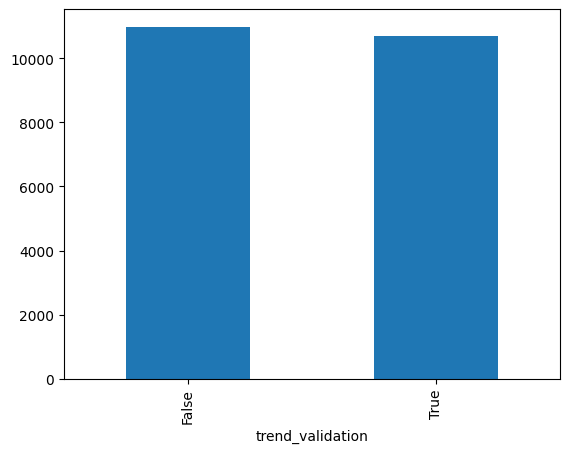

In [3]:
trend_count = results['trend_validation'].value_counts()
trend_count.plot(kind='bar')

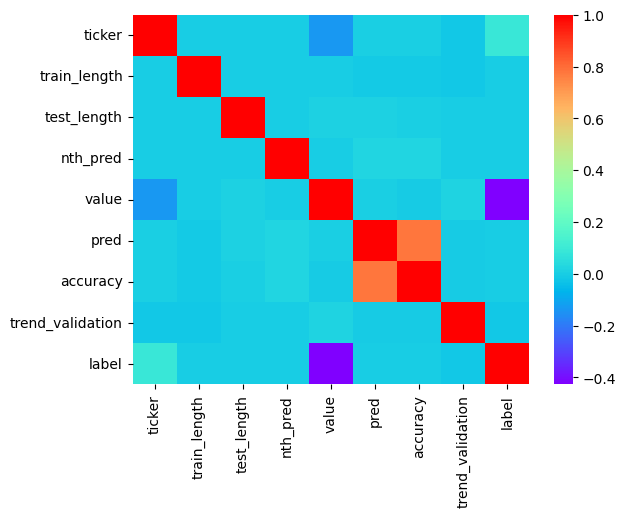

In [6]:
aux_df = copy.deepcopy(results) 
tickers = pd.read_csv('data/TICKERS.csv')

for index, row in aux_df.iterrows():
    idx = tickers[tickers['ticker'] == row['ticker']].index[0]
    aux_df.iloc[index,0] = idx

sns.heatmap(aux_df.corr(), cmap='rainbow')
plt.show()

In [ ]:
trend_count = results['trend_validation'].value_counts()
trend_count.plot(kind='bar')

<Axes: xlabel='trend_validation'>

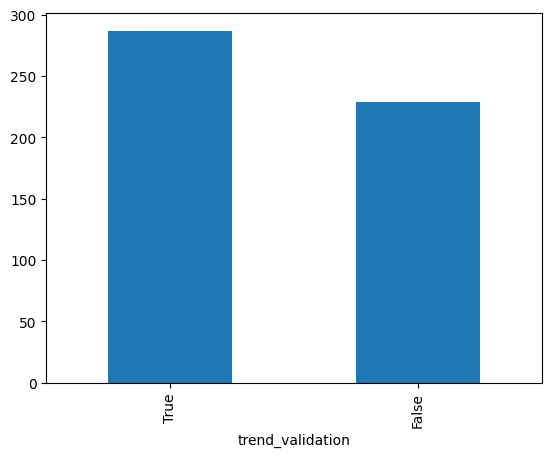

In [15]:
one_year_train = copy.deepcopy(results[results['train_length'] == 30])
half_year_train = copy.deepcopy(results[results['train_length'] == 182])

one_year_train_count = one_year_train['trend_validation'].value_counts()
half_year_train_count = half_year_train['trend_validation'].value_counts()

one_year_train_count.plot(kind='bar')
# half_year_train_count.plot(kind='bar')

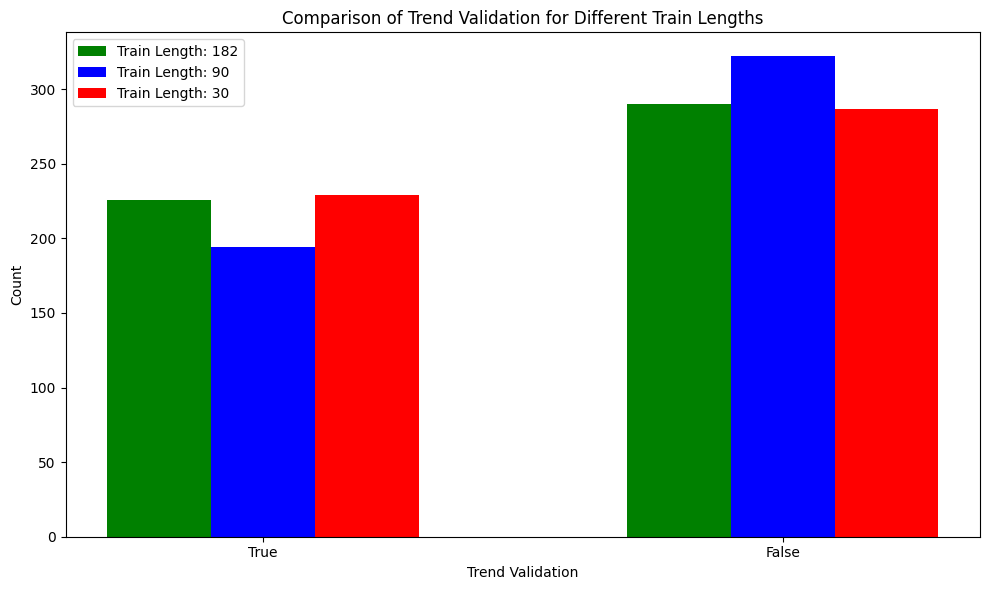

In [60]:
data = copy.deepcopy(results)

data["train_length"] = data["train_length"].astype(int)

# Filter data based on train_length
subset_182 = data[data["train_length"] == 182]
subset_90 = data[data["train_length"] == 90]
subset_30 = data[data["train_length"] == 30]

# Count the occurrences of true and false trend_validation for each subset
count_182 = subset_182["trend_validation"].value_counts()
count_90 = subset_90["trend_validation"].value_counts()
count_30 = subset_30["trend_validation"].value_counts()

# Create a single bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot data for each subset
ax.bar(
    count_30.index - 0.2,
    count_182.values,
    width=0.2,
    color="green",
    align="center",
    label="Train Length: 182",
)
ax.bar(
    count_90.index,
    count_90.values,
    width=0.2,
    color="blue",
    align="center",
    label="Train Length: 90",
)
ax.bar(
    count_30.index + 0.2,
    count_30.values,
    width=0.2,
    color="red",
    align="center",
    label="Train Length: 30",
)

ax.set_xlabel("Trend Validation")
ax.set_ylabel("Count")
ax.set_xticks([0, 1])
ax.set_xticklabels(["True", "False"])
ax.set_title("Comparison of Trend Validation for Different Train Lengths")
ax.legend()

plt.tight_layout()
plt.show()

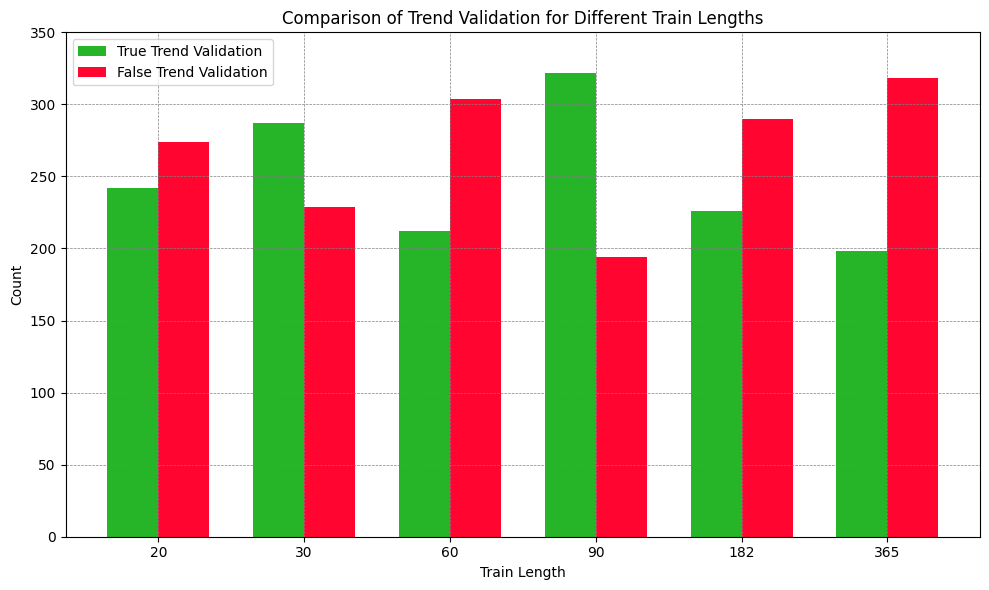

In [69]:
data = copy.deepcopy(results)
# Load your dataset using pandas
data['train_length'] = data['train_length'].astype(int)

distinct_train_length = np.sort(data['train_length'].unique())

# Group data by train_length and trend_validation, and then count occurrences
grouped = data.groupby(['train_length', 'trend_validation']).size().unstack(fill_value=0)

# Filter out train lengths that have zero occurrences of both true and false
filtered_grouped = grouped[grouped[True] + grouped[False] > 0]

# Create a grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))

x = np.array([1,2,3,4,5,6])
width = 0.35

plt.grid(color='gray', linestyle='--', linewidth=0.5)

ax.bar(x - width/2, filtered_grouped[True], width, label='True Trend Validation', color='#26B428')
ax.bar(x + width/2, filtered_grouped[False], width, label='False Trend Validation', color='#FF052F')

ax.set_xlabel('Train Length')
ax.set_ylabel('Count')
ax.set_title('Comparison of Trend Validation for Different Train Lengths')
ax.set_xticks(x)  # Set the x-axis ticks to the filtered train lengths
ax.set_xticklabels(distinct_train_length)  # Set the x-axis tick labels
ax.set_ylim(0, 350)
ax.legend()

plt.tight_layout()
plt.show()

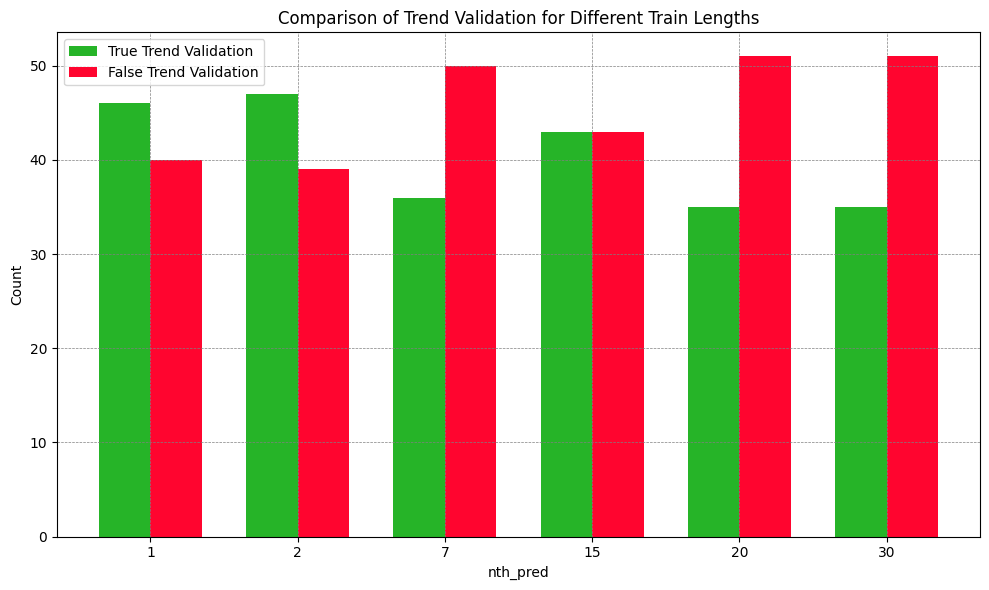

In [91]:
data = copy.deepcopy(results)
# Load your dataset using pandas
data = data[data["train_length"] ==  20]
data['nth_pred'] = data['nth_pred'].astype(int)

distinct_train_length = np.sort(data['nth_pred'].unique())

# Group data by train_length and trend_validation, and then count occurrences
grouped = data.groupby(['nth_pred', 'trend_validation']).size().unstack(fill_value=0)

# Filter out train lengths that have zero occurrences of both true and false
filtered_grouped = grouped[grouped[True] + grouped[False] > 0]

# Create a grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))

x = np.array([1,2,3,4,5,6])
width = 0.35

plt.grid(color='gray', linestyle='--', linewidth=0.5)

ax.bar(x - width/2, filtered_grouped[True], width, label='True Trend Validation', color='#26B428')
ax.bar(x + width/2, filtered_grouped[False], width, label='False Trend Validation', color='#FF052F')

ax.set_xlabel('nth_pred')
ax.set_ylabel('Count')
ax.set_title('Comparison of Trend Validation for Different Train Lengths')
ax.set_xticks(x)  # Set the x-axis ticks to the filtered train lengths
ax.set_xticklabels(distinct_train_length)  # Set the x-axis tick labels
# ax.set_ylim(0, 350)
ax.legend()

plt.tight_layout()
plt.show()

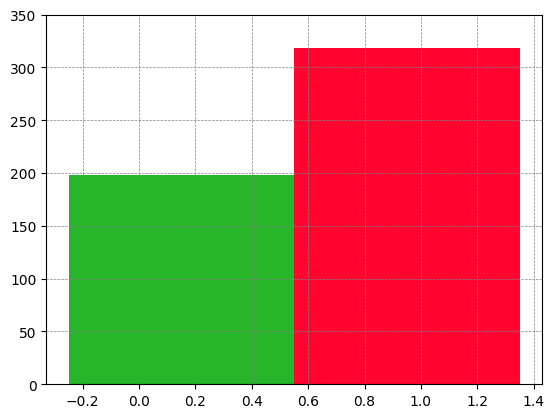

In [83]:
one_year_train = copy.deepcopy(results[results['train_length'] == 365])

one_year_train_count = one_year_train['trend_validation'].value_counts()

plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.bar(0.15, one_year_train_count[True], label='True Trend Validation', color='#26B428')
plt.bar(0.95, one_year_train_count[False], label='False Trend Validation', color='#FF052F')
plt.ylim(0, 350)

plt.show()